In [15]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt
import csv

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

In [2]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

In [3]:
def visualize_data(data):
    points = data
    plt.scatter(points[:, 0], points[:, 1])
    plt.show()

In [38]:
with open('../data/credit_card_dataset.csv', 'r') as f:
    reader = csv.reader(f)
    credit_card_dataset = list(reader)

del credit_card_dataset[0]


credit_card_dataset_extracted = [list(map(float, sublist[1:3])) for sublist in credit_card_dataset]
credit_card_dataset_extracted = np.array(credit_card_dataset_extracted)
print(type(credit_card_dataset_extracted))
print(credit_card_dataset_extracted.shape)

<class 'numpy.ndarray'>
(8950, 2)
<class 'tuple'>
2


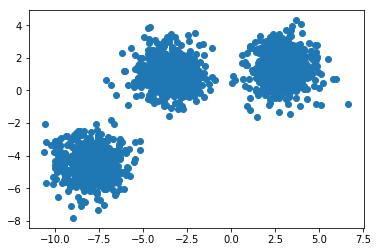

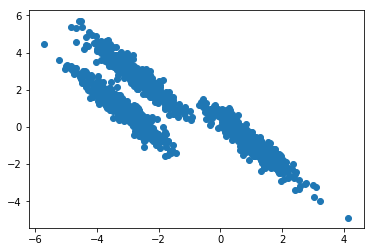

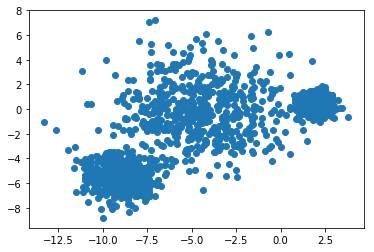

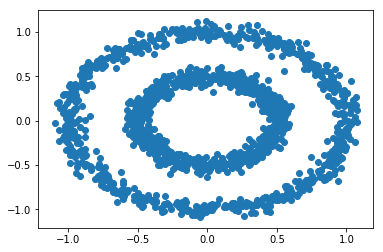

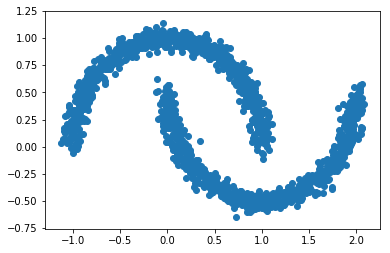

TypeError: list indices must be integers or slices, not tuple

In [20]:
visualize_data(X)
visualize_data(X_aniso)
visualize_data(varied[0])
visualize_data(noisy_circles[0])
visualize_data(noisy_moons[0])

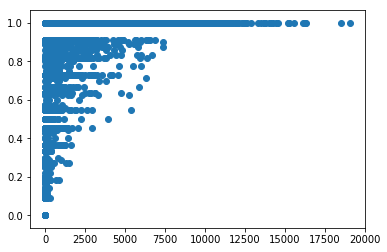

In [33]:
visualize_data(credit_card_dataset_extracted)

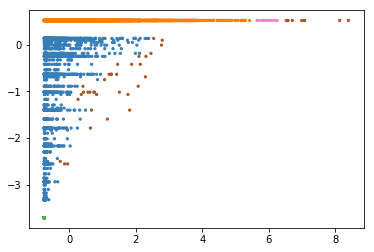

In [42]:
X = credit_card_dataset_extracted
X = StandardScaler().fit_transform(X)
algorithm = cluster.DBSCAN(eps=0.2)
algorithm.fit(X)

if hasattr(algorithm, 'labels_'):
    y_pred = algorithm.labels_.astype(np.int)
else:
    y_pred = algorithm.predict(X)
    
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))    
plt.scatter(X[:, 0], X[:, 1], s=5, color=colors[y_pred])
plt.show()